In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('./251021 변수 추가 데이터.csv')
data

,age,gender,high_exercise,moderate_exercise,breakfast,height,weight,walk_days,sleep_hours,stress,...,social_difficulty_impairment,happy,sleep_quality,missed_medical_care,EQ5D_usual_act_score,EQ5D_pain_score,EQ5D_anxiety_depression,educate,economic_active,is_married
0,31,1,3,0,2,181.0,88.0,7,7.0,3,...,NaN,10.0,2.0,1,1,1,1.0,8.0,1,1
1,29,2,0,0,4,162.0,56.0,7,7.0,1,...,NaN,8.0,2.0,2,1,1,1.0,8.0,1,1
2,31,1,2,2,4,176.0,80.0,5,7.0,2,...,NaN,8.0,3.0,2,1,1,1.0,7.0,1,5
3,37,1,3,1,2,170.0,65.0,7,6.0,4,...,NaN,5.0,2.0,2,1,1,1.0,5.0,1,1
4,36,2,0,4,4,160.0,55.0,7,6.0,2,...,NaN,6.0,2.0,2,1,1,1.0,6.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22901,68,2,0,0,1,160.0,54.0,7,6.0,2,...,5.0,5.0,3.0,1,2,2,3.0,3.0,2,3
22902,64,1,0,0,1,150.0,56.0,7,5.0,2,...,5.0,4.0,3.0,2,1,1,2.0,4.0,2,1
22903,56,2,0,0,1,150.0,60.0,0,8.0,4,...,NaN,10.0,2.0,2,1,1,1.0,3.0,2,1
22904,54,1,0,3,1,177.0,89.0,5,6.0,2,...,NaN,7.0,2.0,2,1,1,1.0,8.0,1,1


In [6]:
# 폰트 설정

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False

In [7]:
data['has_chronic'] = ((data['hypertension'] == 1) | (data['diabetes'] == 1)).astype(int)


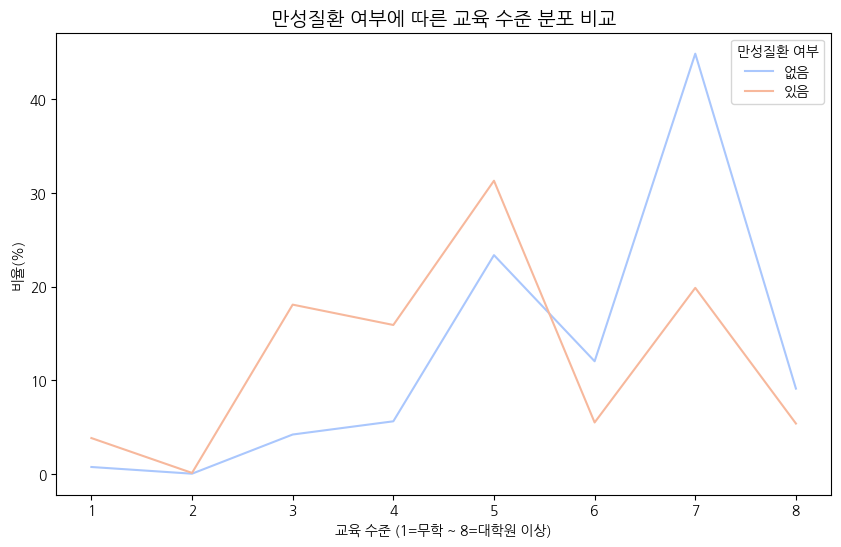

In [10]:
edu_df = data[data['educate'].isin(range(1, 9))].copy()

if 'has_chronic' not in edu_df.columns:
    edu_df['has_chronic'] = ((edu_df['hypertension'] == 1) | (edu_df['diabetes'] == 1)).astype(int)

edu_df['has_chronic_label'] = edu_df['has_chronic'].map({0: '없음', 1: '있음'})

edu_ratio = (
    edu_df
    .groupby(['has_chronic_label', 'educate'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(level=1, name='비율(%)')
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=edu_ratio,
    x='educate',
    y='비율(%)',
    hue='has_chronic_label',
    palette='coolwarm'
)
plt.title('만성질환 여부에 따른 교육 수준 분포 비교', fontsize=14)
plt.xlabel('교육 수준 (1=무학 ~ 8=대학원 이상)')
plt.ylabel('비율(%)')
plt.legend(title='만성질환 여부')
plt.show()